In [41]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from vrp_algorithms_lib.algorithm.neural_networks.hcvrp_drl.models.greedy_model import GreedyModel
from vrp_algorithms_lib.algorithm.neural_networks.hcvrp_drl.inference.greedy_inference import GreedyInference
from vrp_algorithms_lib.problem.models import ProblemDescription
from vrp_algorithms_lib.common_tools import file_utils
from vrp_algorithms_lib.analytical_tools import viz

import matplotlib.pyplot as plt

In [55]:
problem_description_json = file_utils.read_json(f'../test_data/inputs/simple_test_1/problem_description.json')
problem_description: ProblemDescription = ProblemDescription.parse_obj(problem_description_json)
request = file_utils.read_json(f'../test_data/inputs/simple_test_1/request.json')

#### Greedy inference with greedy algorithm

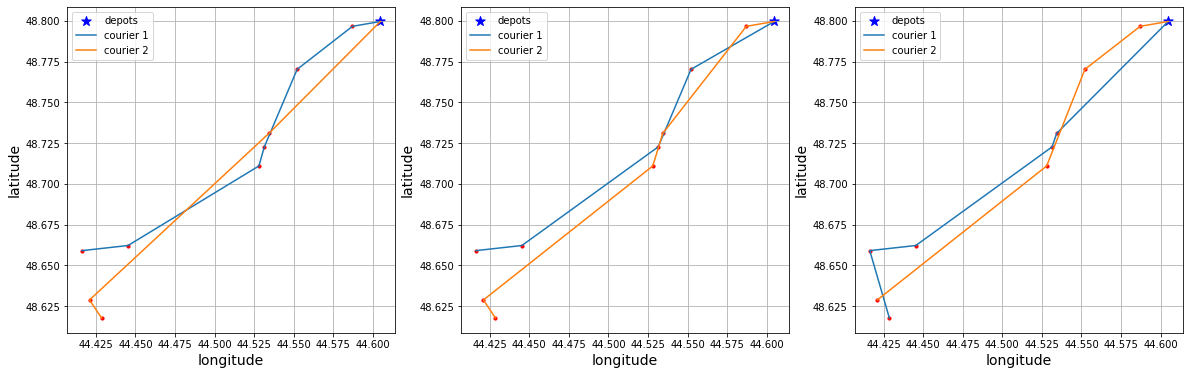

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i in range(3):
    ax = axes[i]
    
    greedy_inference = GreedyInference(
        model=GreedyModel(device='cpu'),
        problem_description=problem_description,
        initial_capacity=100,
        device='cpu'
    )
    routes = greedy_inference.solve_problem()
    viz.plot_routes(request=request, routes=routes.dict()['routes'], ax=ax)